In [1]:
import preprocessing as prep
import plotting as plot
import numpy as np
from np_fun import device_function,prob_part
from Annealing import Annealer
from MomentumAnneal import MomentumAnnealer
from LossLandscape import LossLandscape

import matplotlib.pyplot as plt
    
carr =lambda f,z: lambda x: f(z,x)
sampl = lambda f,fm=0,to=10,cnt=100: [np.linspace(fm,to,cnt),f(np.linspace(fm,to,cnt))]
%autoreload 2


In [2]:
data0 = prep.read_data_name('20_11_2018_16-02')
params ={ 
   'filenames': [ 
       './data_11/data_20-11-2018_16-56_port0.csv', 
       './data_11/data_20-11-2018_16-55_port1.csv',
       './data_11/data_20-11-2018_16-55_MPD_port2.csv'
    ],
    'exp_params' : {
        'scaling_channels':[3,3,500],
        'min_amp_per':[0,10,300/4],
        'start_end_index':[-160,-10],
    }
}

data1 = prep.read_data_params(params)
params ={ 
   'filenames': [ 
       './data_11/data_20-11-2018_19-25_port0.csv',
       './data_11/data_20-11-2018_19-25_port1.csv',
       './data_11/data_20-11-2018_19-25_MPD_port2.csv',
    ],
    'exp_params' : {
        'scaling_channels':[3,3,500],
        'min_amp_per':[0,10,300/4],
        'start_end_index':[-160,-10],
    }
}
data2 = prep.read_data_params(params)

>> Read 3 channels with lengths 2
>> Read 3 channels with lengths 2
>> Read 3 channels with lengths 2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f326a22d940>,
      dtype=object)

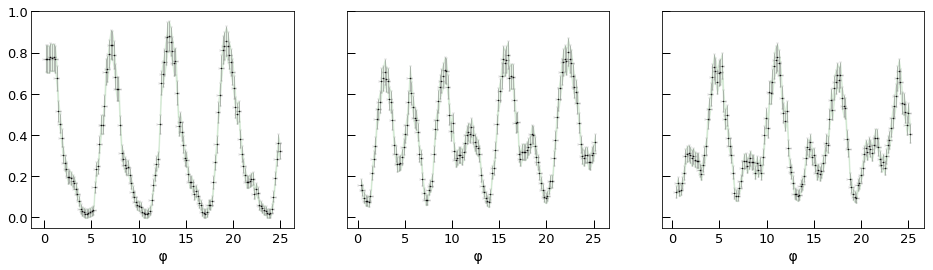

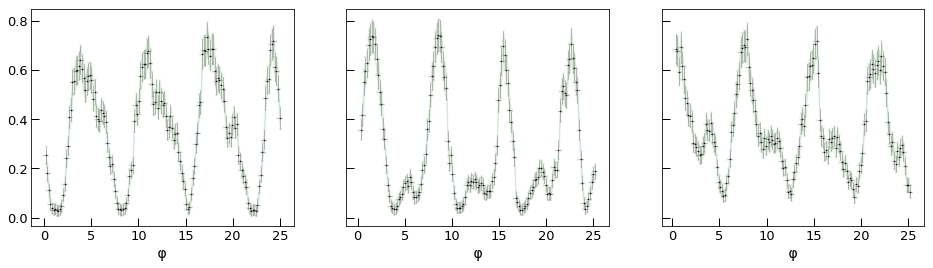

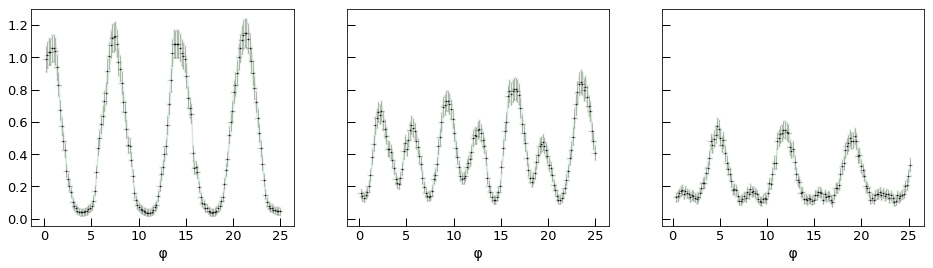

In [3]:
ideal_fourier = carr(device_function,[0.4]*4)

#plot.plot3( func=lambda x: ideal_fourier(x).T, data=data)
plot.plot3( data=data0)
plot.plot3( data=data1)
plot.plot3( data=data2)


## Optimization


In [4]:
def unit_all_ext(z,x):
    scale = np.array([z[6],z[8],z[10]]).reshape(-1,1)
    bias= np.array([z[7],z[9],z[11]]).reshape(-1,1)
    
    v = prob_part(z[0],z[1],z[2],z[3], phi=z[4]*x+z[5])
    sq = np.abs(v*np.conjugate(v))
                  
    return np.multiply(sq.T,scale)+bias
    
data = data0
domain = np.array(data[0][1])
points = np.array([ x[0] for x in data])



In [5]:

opt = Annealer(unit_all_ext,points_data=(domain,points),energy=0.01)
momopt= MomentumAnnealer(unit_all_ext,points_data=(domain,points))

COST = opt.cost


In [41]:
start = [0]*4 +[1,0] + [1,0]*3
### 16-02
#start = [-0.77338807, 0.71445302,-0.75957359, 0.13603367,0.98436724,-0.10741559,1.17953092,-0.00559215, 0.96529957, 0.13260642, 0.64658049, 0.19579248]
### 16-55

scales= np.array([0.5]*4+[0.9,0.9]+[.9,.9]*3)*0.03
#scales= np.array([1]*12)*0.1
#start= np.array([1]*12)
print("Start:",start)
point,cost = momopt.opt( start_point=start,
                     scales =scales,
                     max_steps = 2390,
                    
                        sample_count=33,
                        lr = 0.6,
                    )
print(momopt.loss(start))
plt.figure(figsize=(15,5))
plt.plot([np.min(f) for f in momopt.deltas])
plt.plot([np.max(f) for f in momopt.deltas])
plt.axhline(y=0., color='r', linestyle='-')

plt.figure(figsize=(15,5))
plt.plot(momopt.costs)
pts =np.array( momopt.dots)

  0%|          | 2/2390 [00:00<02:19, 17.09it/s]

Start: [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]


  4%|▎         | 85/2390 [00:03<01:40, 22.94it/s]


KeyboardInterrupt: 

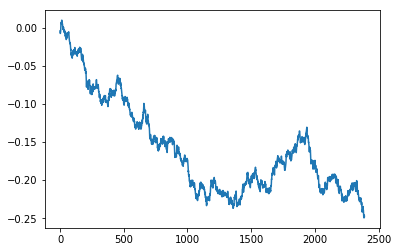

In [190]:
#plt.plot(pts.T[4])
plt.plot(pts.T[1])

best point: [ 0.24052324 -0.21693912  0.56789461  0.1821822   0.98460358 -0.30548852
  5.5722817  -0.33610048  4.6537425   0.18373615  4.84425343  0.13889549]
best cost: 2.3200899378647084


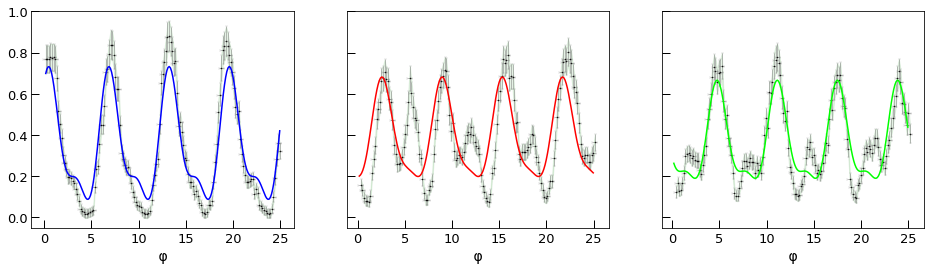

In [191]:
print('best point:',opt.best)
#best_fun= carr(opt.func,opt.dots[-1])
best_fun= carr(opt.func,opt.best)
#fourier_fun= carr(opt.func,[0,0,0,0]+list(opt.best[4:]))
print('best cost:',opt.cost(best_fun,))
axes = plot.plot3(lambda x: best_fun(x),data)
plt.savefig('figs/exp_20-11_16-02.pdf')


 99%|█████████▉| 4959/5000 [00:11<00:00, 416.04it/s]/ubtu/home/danlkv/quantTechLab/Fit/Annealing.py:22: RuntimeWarning: overflow encountered in exp
  return lambda e,e_,t: 1/(1+np.exp(-((e-e_)*(1+0.5*np.heaviside(e_-e,0))/energy-0.3/t)))
100%|██████████| 5000/5000 [00:12<00:00, 415.98it/s]


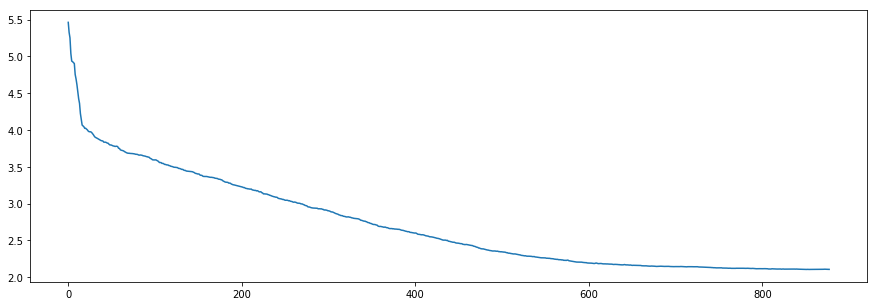

In [10]:

start = [0]*12
### 16-02
#start = [-0.77338807, 0.71445302,-0.75957359, 0.13603367,0.98436724,-0.10741559,1.17953092,-0.00559215, 0.96529957, 0.13260642, 0.64658049, 0.19579248]
### 16-55
start = [0]*4 +[1,0] + [1,0]*3

#start= opt.best
scales= np.array([0.5]*4+[0.9,0.9]+[.9,.9]*3)*0.0019
point,cost = opt.opt( start_point=start,
                     energy=0.001,
                     scales =scales,
                     max_steps =5000
                    )
plt.figure(figsize=(15,5))
plt.plot(opt.costs)

In [13]:
#opt =momopt
print('best point:',opt.best)
best_fun= carr(opt.func,opt.best)
#fourier_fun= carr(opt.func,[0,0,0,0]+list(opt.best[4:]))
print('best cost:',opt.cost(best_fun,))
axes = plot.plot3(lambda x: best_fun(x),data)

AttributeError: 'Annealer' object has no attribute 'best'

## Fit per-channel

0.5035225967236745
[0.28885303 0.32534599 0.36112327 0.39501491 0.42589047 0.45270358
 0.47453342 0.49062139 0.5004014  0.5035226  0.49986354 0.48953719
 0.4728866  0.45047141 0.42304572 0.39152826 0.35696615 0.32049365
 0.28328772 0.24652209 0.21132198 0.17872101 0.1496224  0.12476579
 0.10470121 0.0897711  0.08010124 0.07560075 0.07597123 0.08072454
 0.08920841 0.1006388  0.11413752 0.12877352 0.14360602 0.1577277
 0.17030599 0.18062074 0.18809665 0.19232904 0.19310189 0.19039738
 0.18439645 0.17547047 0.16416432 0.15117156 0.13730287 0.12344901
 0.11053998 0.09950206 0.09121467 0.08646882 0.08592903 0.09010034
 0.09930191 0.11364821 0.13303892 0.1571578  0.18548071 0.2172925
 0.25171218 0.28772517]


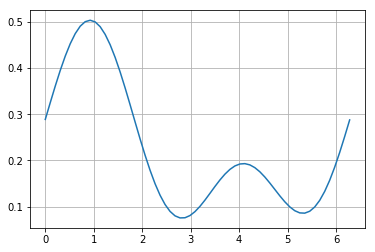

In [14]:
unit_channel1 = lambda z,x: unit_all_ext(z,x).T@np.array([1,0,0]).reshape(-1)
unit_channel2 = lambda z,x: unit_all_ext(z,x).T@np.array([0,1,0]).reshape(-1)
unit_channel3 = lambda z,x: unit_all_ext(z,x).T@np.array([0,0,1]).reshape(-1)

pts = sampl(carr(unit_channel1,[1]*4+[-1,0]+[1,0]*3), to=6.28, cnt =int( np.pi*2 /0.1) )
plt.plot(*pts)

print(np.max(pts[1]))
plt.grid()
print(pts[1])

In [47]:

opt = Annealer(unit_channel3,points_data=(domain,points[2]),energy=0.01)

100%|██████████| 1000/1000 [00:02<00:00, 399.66it/s]


0.7737899271299536


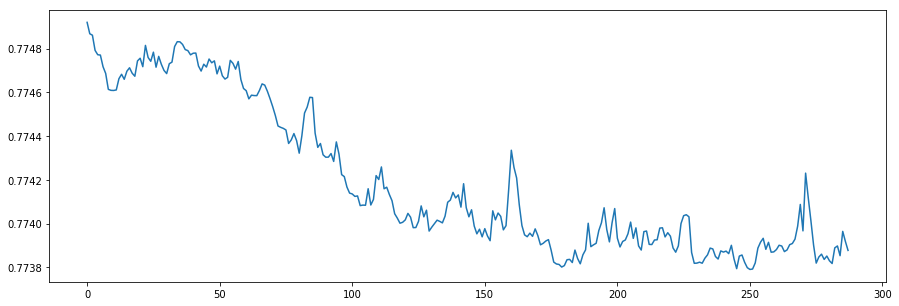

In [137]:
start = [-0.77338807, 0.71445302,-0.75957359, 0.13603367,0.98436724,-0.10741559,1.17953092,-0.00559215, 0.96529957, 0.13260642, 0.64658049, 0.19579248]
#start = [0]*12

scales= np.array([0.5]*4+[0.01,0.9]+[.6,.6]+[0.0,0.0]+[0,0])*0.002
start = opt.best
point,cost = opt.opt( start_point=start,
                     energy=0.0001,
                     scales =scales,
                     max_steps =1000
                    )
plt.figure(figsize=(15,5))
plt.plot(opt.costs)
print(np.min(opt.costs))

0.369255033557047
cost: 0.5986981977953986
(149,)
(149,)


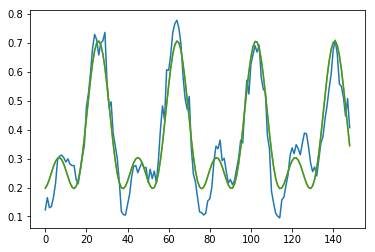

In [138]:
print(np.mean(opt.data))
plt.plot(opt.data)
fvals = carr(opt.func,opt.best)(opt.points)
print("cost:", (np.sum(np.square(opt.data-fvals.reshape(-1)))))
print(fvals.reshape(-1).shape)
print(opt.data.shape)
plt.plot( fvals)
plt.plot( fvals)
print('best point:',opt.best)
print('best point:',s[:4])
print('in:',s[4:6])
print('out1:',s[6:8])
print('out2:',s[8:10])
print('out3:',s[10:12])

In [186]:
def print_point(p):
    s = np.array(p).round(4)
    print('phases:',s[:4])
    print('input linear:',s[4:6])
    print('out1:',s[6:8])
    print('out2:',s[8:10])
    print('out3:',s[10:12])

best point: [-7.73457062e-01  7.12537338e-01 -7.57613667e-01  1.30912832e-01
  9.79985088e-01 -1.06195994e-01  1.18145752e+00  1.17241904e-03
  9.58597047e-01  1.34727487e-01  6.49272862e-01  1.94823888e-01]
best point: [-0.773  0.713 -0.758  0.131]
in: [ 0.98  -0.106]
out1: [1.181e+00 1.000e-03]
out2: [0.959 0.135]
out3: [0.649 0.195]
best cost: 6.403992623574058


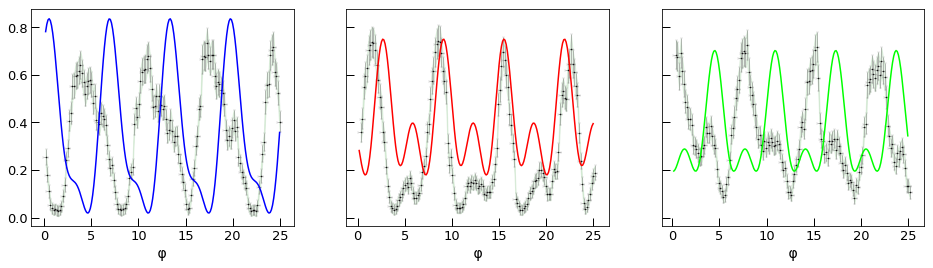

In [187]:

s = np.array(opt.best).round(3)
print('best point:',opt.best)
print('best point:',s[:4])
print('in:',s[4:6])
print('out1:',s[6:8])
print('out2:',s[8:10])
print('out3:',s[10:12])
      
best_fun= carr(unit_all_ext,opt.best)
#fourier_fun= carr(opt.func,[0,0,0,0]+list(opt.best[4:]))
print('best cost:',opt.cost(best_fun,))
axes = plot.plot3(lambda x: best_fun(x),data)


In [188]:
channel1_best = [-0.87173253,0.67129027,-0.8325409,0.16308578,0.99011369,-0.01156268,1.21014591,-0.01804586,0.96529957, 0.13260642, 0.64658049, 0.19579248]
channel2_best = [-1.07094707,  0.30251314, 0.19150058, -0.80279852, 0.97348069, -0.0859241, 1.17953092, -0.00559215, 0.96549397, 0.0967909, 0.64658049,0.19579248]
channel3_best =  [ 0.7049897,0.68916782,-0.70677607,0.31093788,0.97901993,-0.02919347,1.23938858,-0.0067658,0.96529957, 0.13260642,0.64658049,0.19579248]

print_point(channel1_best)
print_point(channel2_best)
print_point(channel3_best)

phases: [-0.8717  0.6713 -0.8325  0.1631]
input linear: [ 0.9901 -0.0116]
out1: [ 1.2101 -0.018 ]
out2: [0.9653 0.1326]
out3: [0.6466 0.1958]
phases: [-1.0709  0.3025  0.1915 -0.8028]
input linear: [ 0.9735 -0.0859]
out1: [ 1.1795 -0.0056]
out2: [0.9655 0.0968]
out3: [0.6466 0.1958]
phases: [ 0.705   0.6892 -0.7068  0.3109]
input linear: [ 0.979  -0.0292]
out1: [ 1.2394 -0.0068]
out2: [0.9653 0.1326]
out3: [0.6466 0.1958]


## Landscape

In [191]:
a = np.array([[0,0,1],[1,0,0]]).reshape(2,-1,1)


grid shape (100, 100, 12)
val shape (100, 100)
min, max 4.194119620857048 177.83452716899663


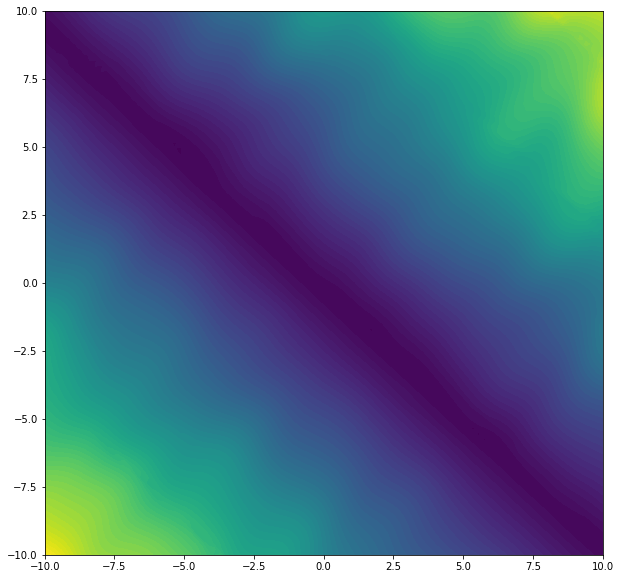

In [211]:

best = [channel1_best,channel2_best,channel3_best]
#best = [best[2],best[0],best[1]]
best = [best[1],best[2],best[1]]
g,v = LossLandscape( lambda x: COST(carr(unit_all_ext,x)), best, scale=20, dots=100)
print('min, max',np.min(v),np.max(v))

In [213]:
# Symmetry

In [12]:
def sym(x):
    a = np.array(x)
    b = a.copy()
    b[0] = a[0]
    b[1] = a[1] + np.pi
    b[2] = -a[2] +4*np.arctan(np.sqrt(2)) 
    b[3] = a[2]+a[3]-2*np.arctan(np.sqrt(2)) + np.pi
    return b

best point: [-0.07223713 -0.07878488 -0.08648871 -0.00994285  0.98896949 -0.42582086
  0.93314377  0.08106949  0.55401709  0.23674003  0.55611387  0.20623669]
best cost: 2.104195128554806


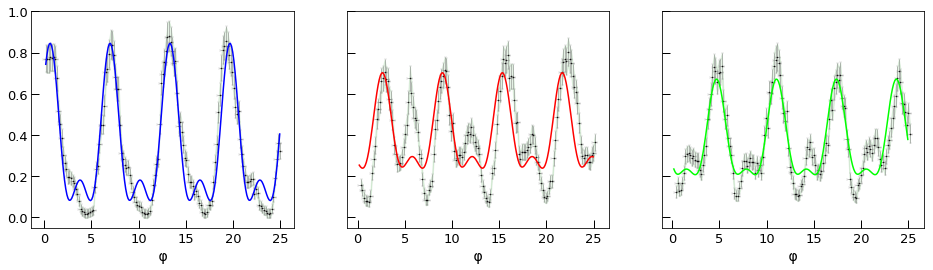

In [13]:
print('best point:',opt.best)
best_fun= carr(opt.func,opt.best)
#fourier_fun= carr(opt.func,[0,0,0,0]+list(opt.best[4:]))
print('best cost:',opt.cost(best_fun,))
axes = plot.plot3(lambda x: best_fun(x),data)

point: [-0.07223713  3.06280778  3.90775519  1.13452786  0.98896949 -0.42582086
  0.93314377  0.08106949  0.55401709  0.23674003  0.55611387  0.20623669]
best cost: 2.2613193477081293


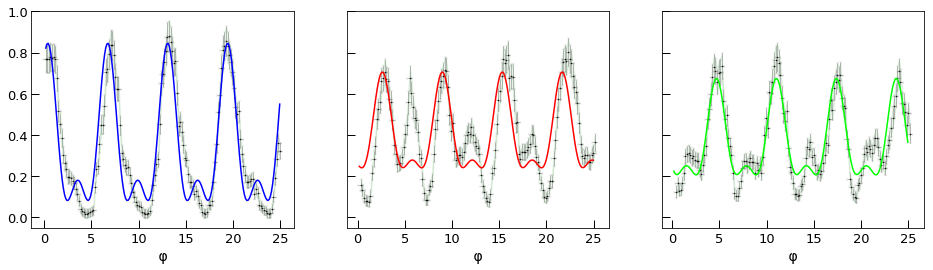

In [22]:
reflected = sym(opt.best)
print("point:",reflected)
best_fun= carr(opt.func,reflected)
#fourier_fun= carr(opt.func,[0,0,0,0]+list(opt.best[4:]))
print('best cost:',opt.cost(best_fun,))
axes = plot.plot3(lambda x: best_fun(x),data)

p1 norm: 4.9123974839323195, p2 norm: 0.6330324215500467
sc 2.7755575615628914e-17
ort 0.8423088149965444
pw [ 0.47326183 -0.25967035  0.72017463  0.43582457  0.          0.
  0.          0.          0.          0.          0.          0.        ]
grid shape (180, 180, 12)
val shape (180, 180)
min, max 2.224200765785822 10.359456283595204


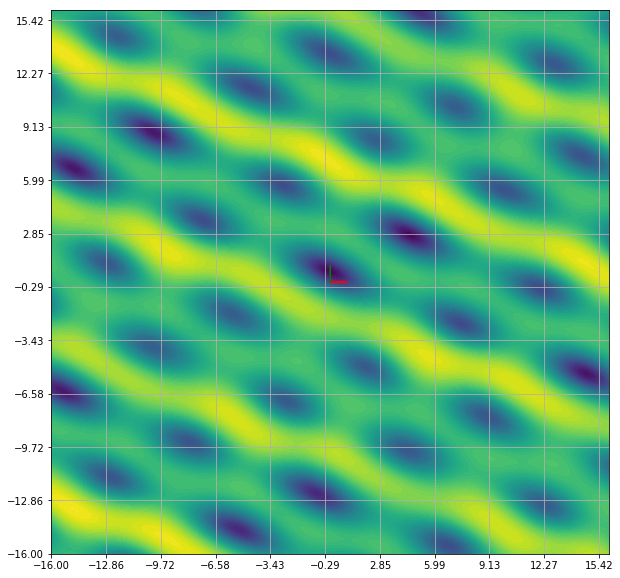

In [343]:
s = [0]*4+list(opt.best[4:])
p1 = reflected - s
p2 = opt.best - s
p1n, p2n = np.linalg.norm(p1), np.linalg.norm(p2)
print("p1 norm: %s, p2 norm: %s"%(p1n, p2n))
p1/=p1n
p2/=p2n
ort = p1 - p2*np.dot(p1,p2)/np.linalg.norm(p2)
print("sc",np.dot(ort,p2))
print("ort",np.linalg.norm(ort))
print("pw",p2)
best = [ s, p2, ort]
g,v = LossLandscape( lambda x: COST(carr(unit_all_ext,x)), best, scale=32, dots=180)
plt.arrow(0,0,0,1,color='g')
plt.arrow(0,0,1,0,color='r')
major_ticks = np.arange(-16,16,np.pi)
plt.xticks(major_ticks)
plt.yticks(major_ticks)
plt.grid()
print('min, max',np.min(v),np.max(v))

grid shape (30, 30, 12)
val shape (30, 30)


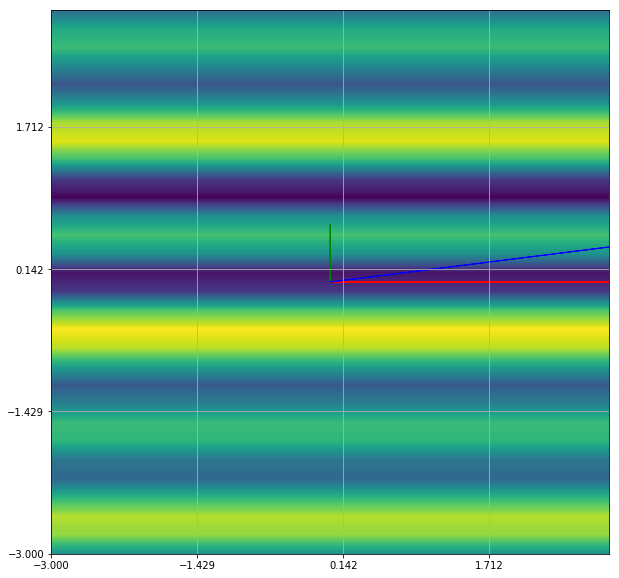

In [342]:

p1 = s- reflected
p2 = opt.best - reflected
s = reflected
best = [ s, p2, p1]
g,v = LossLandscape( lambda x: COST(carr(unit_all_ext,x)), best, scale=6, dots=30)

plt.arrow(0,0,0,p2n,color='g')
plt.arrow(0,0,p1n,0,color='r')
plt.arrow(0,0,p1n,p2n,color='b')

In [301]:
g


array([[[-3.22572411, -2.27942183, -8.65880561, ...,  0.19015969,
          4.37372932,  0.14705265],
        [-3.20592138, -2.08262984, -8.43635649, ...,  0.19015969,
          4.37372932,  0.14705265],
        [-3.18611865, -1.88583784, -8.21390737, ...,  0.19015969,
          4.37372932,  0.14705265],
        ...,
        [-2.49302326,  5.00188202, -0.42818822, ...,  0.19015969,
          4.37372932,  0.14705265],
        [-2.47322054,  5.19867401, -0.2057391 , ...,  0.19015969,
          4.37372932,  0.14705265],
        [-2.45341781,  5.39546601,  0.01671002, ...,  0.19015969,
          4.37372932,  0.14705265]],

       [[-3.08010508, -2.3593204 , -8.43721342, ...,  0.19015969,
          4.37372932,  0.14705265],
        [-3.06030236, -2.1625284 , -8.2147643 , ...,  0.19015969,
          4.37372932,  0.14705265],
        [-3.04049963, -1.96573641, -7.99231518, ...,  0.19015969,
          4.37372932,  0.14705265],
        ...,
        [-2.34740424,  4.92198345, -0.20659602, ...,  

In [302]:
p1


array([ 0.06435886,  0.63957399,  0.72295964, -0.25324379,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [303]:
p2



array([ 0.47326183, -0.25967035,  0.72017463,  0.43582457,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [304]:
ort

array([-0.06563079,  0.710897  ,  0.52515106, -0.37295064,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

best cost: 4.3215305652634814


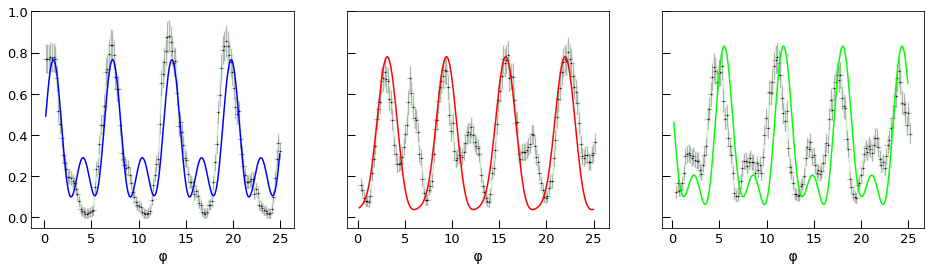

In [36]:
point = [1,1,1,1]+ [-1,0] + [1,0]*3
best_fun= carr(unit_all_ext,point)
#fourier_fun= carr(opt.func,[0,0,0,0]+list(opt.best[4:]))
print('best cost:',opt.cost(best_fun,))
axes = plot.plot3(lambda x: best_fun(x),data)

